# Phase 2
State/UT wise analysis.
Note :

You need to be careful as this phase is whole state/ut wise analysis (not district-wise).

It is up to you which columns you want to keep or delete to make proper analysis"

2.1 Analysis of Literacy Rate vs Total Crimes.

2.2 Analysis of the type of crime vs each state vs Literacy rate.

2.3 Analysis of year-on-year total crime rate.

2.4 Analysis of area vs overall crime

2.5 Analysis of Population vs overall Crime

2.6 Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:\\Users\\admin\\Downloads\\crime_data.csv")
print(data.head())

       States/UTs          District  Year  Murder  Attempt to commit Murder  \
0  Andhra Pradesh         Anantapur  2014     134                       171   
1  Andhra Pradesh          Chittoor  2014      84                       170   
2  Andhra Pradesh          Cuddapah  2014      80                       162   
3  Andhra Pradesh     East Godavari  2014      64                        84   
4  Andhra Pradesh  Guntakal Railway  2014      14                         4   

   Culpable Homicide not amounting to Murder  \
0                                          8   
1                                          2   
2                                          1   
3                                          2   
4                                          0   

   Attempt to commit Culpable Homicide  Rape  Custodial Rape  \
0                                    0    35               0   
1                                    0    32               0   
2                                    0    28

In [21]:
data["Rape"] = data["Rape"] + data["Custodial Rape"] + data["Custodial_Gang Rape"]
drop_tables = ["Custodial_Gang Rape", "Custodial Rape", "Rape other than Custodial"]
data = data.drop(drop_tables, axis=1)

In [22]:
print(data.head())

       States/UTs          District  Year  Murder  Attempt to commit Murder  \
0  Andhra Pradesh         Anantapur  2014     134                       171   
1  Andhra Pradesh          Chittoor  2014      84                       170   
2  Andhra Pradesh          Cuddapah  2014      80                       162   
3  Andhra Pradesh     East Godavari  2014      64                        84   
4  Andhra Pradesh  Guntakal Railway  2014      14                         4   

   Culpable Homicide not amounting to Murder  \
0                                          8   
1                                          2   
2                                          1   
3                                          2   
4                                          0   

   Attempt to commit Culpable Homicide  Rape  Custodial_Other Rape  \
0                                    0    35                     0   
1                                    0    32                     0   
2                         

In [23]:
data_states = data["States/UTs"].unique()
murder_by_state={}
for state in data_states:
    data_state = data[data["States/UTs"] == state]
    total_murder = data_state["Murder"].sum()
    murder_by_state[state] = total_murder
print(murder_by_state)

{'Andhra Pradesh': 2350, 'Arunachal Pradesh': 172, 'Assam': 2902, 'Bihar': 6806, 'Chhattisgarh': 1996, 'Goa': 68, 'Gujarat': 2248, 'Haryana': 2212, 'Himachal Pradesh': 260, 'Jammu & Kashmir': 312, 'Jharkhand': 3316, 'Karnataka': 3272, 'Kerala': 734, 'Madhya Pradesh': 4548, 'Maharashtra': 5340, 'Manipur': 192, 'Meghalaya': 318, 'Mizoram': 84, 'Nagaland': 116, 'Odisha': 2900, 'Punjab': 1534, 'Rajasthan': 3274, 'Sikkim': 24, 'Tamil Nadu': 3610, 'Telangana': 2616, 'Tripura': 280, 'Uttar Pradesh': 10300, 'Uttarakhand': 436, 'West Bengal': 4740, 'A&N Islands': 16, 'Chandigarh': 48, 'D&N Haveli': 8, 'Daman & Diu': 14, 'Delhi UT': 1172, 'Lakshadweep': 0, 'Puducherry': 50}


In [24]:
new_table = data.pivot_table(index="States/UTs", values="Murder",aggfunc=np.std)
print(new_table)

                       Murder
States/UTs                   
A&N Islands          3.162278
Andhra Pradesh     246.113166
Arunachal Pradesh   18.599377
Assam              261.238661
Bihar              488.862506
Chandigarh           0.000000
Chhattisgarh       179.626213
D&N Haveli           0.000000
Daman & Diu          3.214550
Delhi UT           127.905146
Goa                 14.094916
Gujarat            170.149180
Haryana            213.522466
Himachal Pradesh    31.118055
Jammu & Kashmir     27.581317
Jharkhand          309.212652
Karnataka          264.211567
Kerala              75.021613
Lakshadweep          0.000000
Madhya Pradesh     299.304267
Maharashtra        382.899893
Manipur             26.699677
Meghalaya           42.391037
Mizoram             12.393547
Nagaland            16.461157
Odisha             232.851330
Puducherry           9.712535
Punjab             138.062446
Rajasthan          244.705613
Sikkim               4.690416
Tamil Nadu         270.446716
Telangana 

# Use of Matplotlib

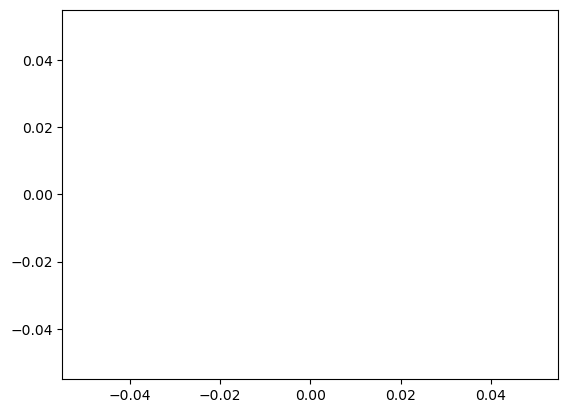

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot()
plt.show()

In [27]:
x_values = new_table.index
print(x_values)

Index(['A&N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='States/UTs')


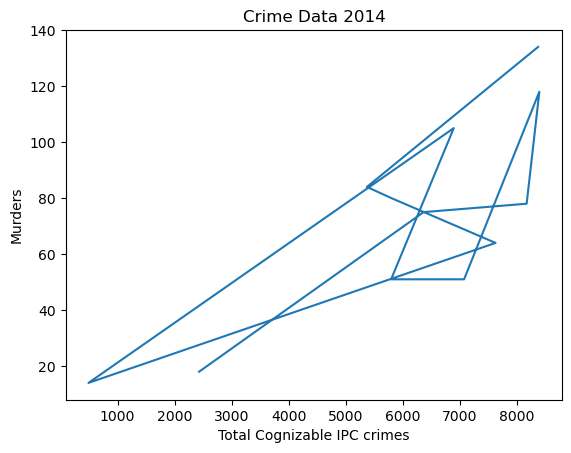

In [28]:
x_values = data["Total Cognizable IPC crimes"].head(12)
y_values = data["Murder"].head(12)
plt.plot(x_values, y_values)
plt.xlabel("Total Cognizable IPC crimes")
plt.ylabel("Murders")
plt.title("Crime Data 2014")
plt.show()

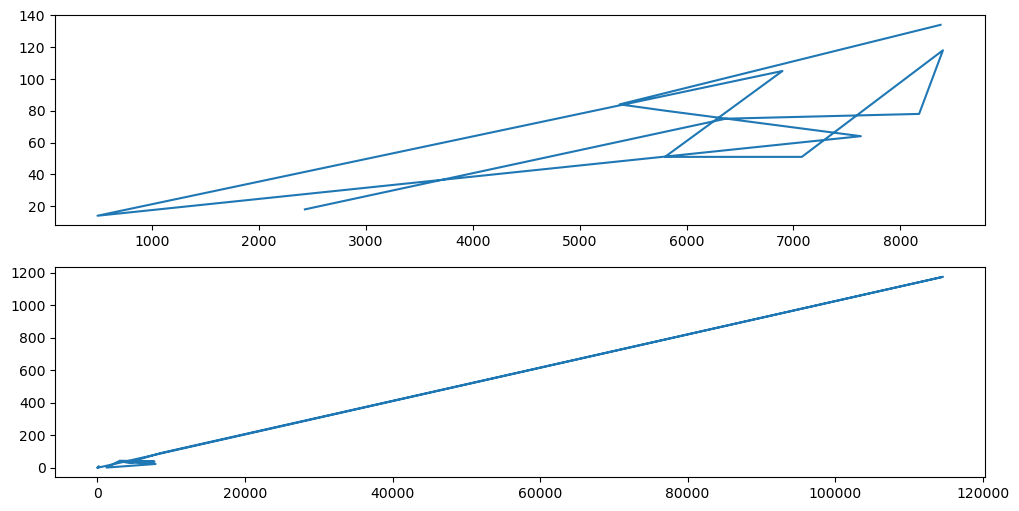

In [29]:
x_b_values = data["Total Cognizable IPC crimes"].iloc[12:24]
y_b_values = data["Murder"].iloc[12:24]
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(x_values,y_values)
ax2.plot(x_b_values,y_b_values)
plt.plot()
plt.show()

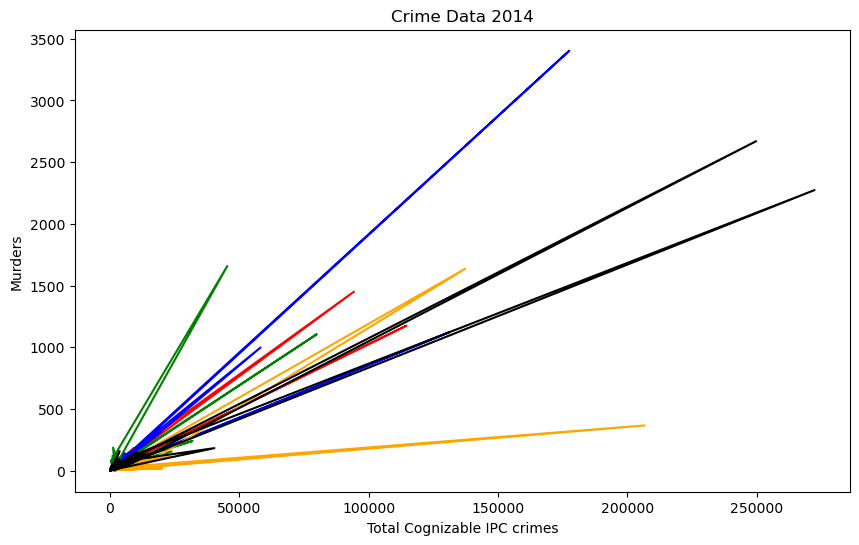

In [30]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*100
    end_index = (i+1)*100
    x_values = data["Total Cognizable IPC crimes"].iloc[start_index:end_index]
    y_values = data["Murder"].iloc[start_index:end_index]
    plt.plot(x_values,y_values,c=colors[i])
plt.xlabel("Total Cognizable IPC crimes")
plt.ylabel("Murders")
plt.title("Crime Data 2014")
plt.show()

# We will now use Barplots and Scatterplots to better visulaize the data

NameError: name 'bar_positions' is not defined

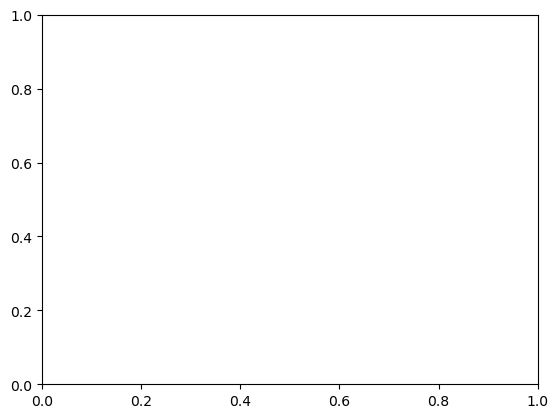

In [33]:
fig, ax = plt.subplots()
ax.barh(bar_positions,bar_heights,0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols, rotation=0)
plt.ylabel("Crimes")
plt.xlabel("Number")
plt.title("Crime Data 2014")
plt.show()

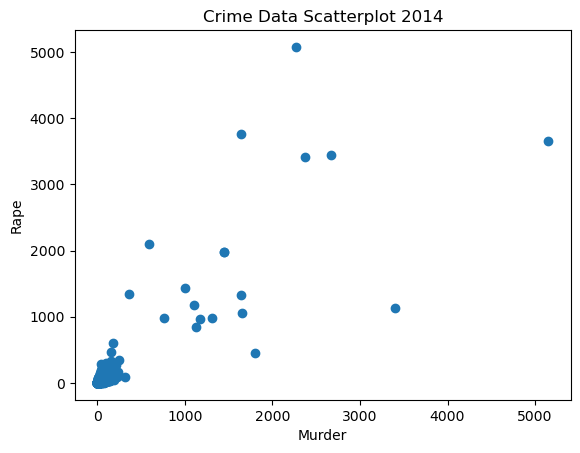

In [34]:
fig, ax = plt.subplots()
ax.scatter(data["Murder"], data["Rape"])
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.title("Crime Data Scatterplot 2014")
plt.show()


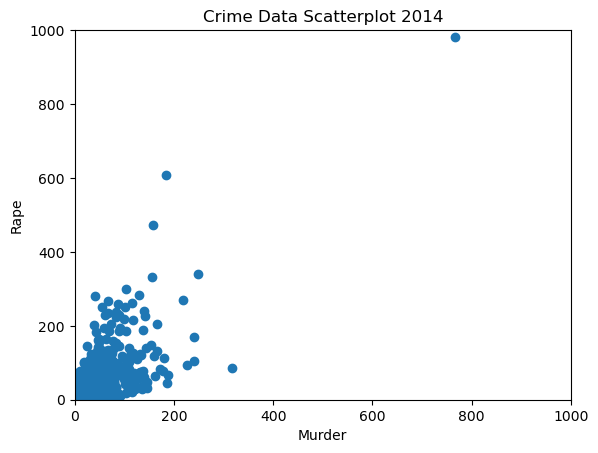

In [35]:
fig, ax = plt.subplots()
ax.scatter(data["Murder"], data["Rape"])
ax.set_xlim(0,1000)
ax.set_ylim(0,1000)
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.title("Crime Data Scatterplot 2014")
plt.show()

In [36]:
freq_counts_murder = data["Murder"].value_counts()
sorted_freq_counts = freq_counts_murder.sort_index()
print(sorted_freq_counts)

0       32
1       18
2       15
3       10
4       19
        ..
2274     1
2370     1
2670     1
3403     1
5150     1
Name: Murder, Length: 164, dtype: int64


# Histograms and using bins

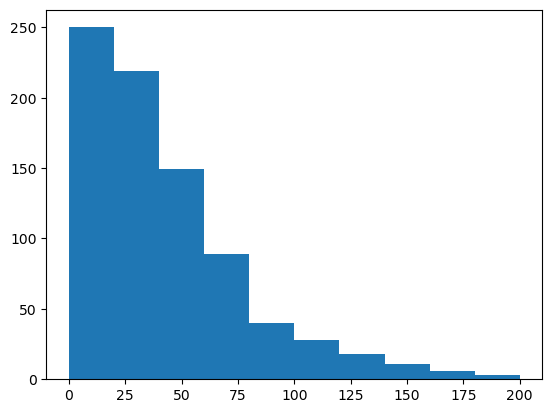

In [37]:
fig, ax = plt.subplots()
ax.hist(data['Murder'], range=(0,200))
plt.show()

# Box Plots

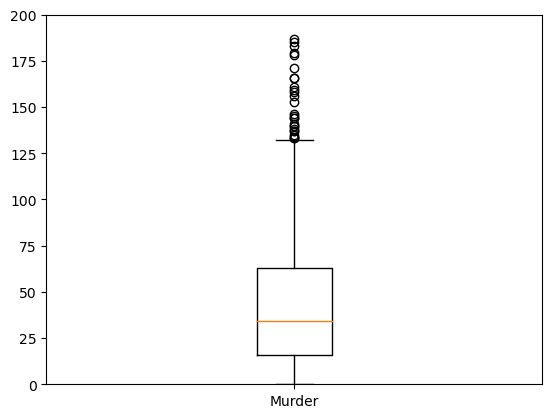

In [38]:
fig, ax = plt.subplots()
ax.boxplot(data['Murder'])
ax.set_ylim(0,200)
ax.set_xticklabels(['Murder'])
plt.show()

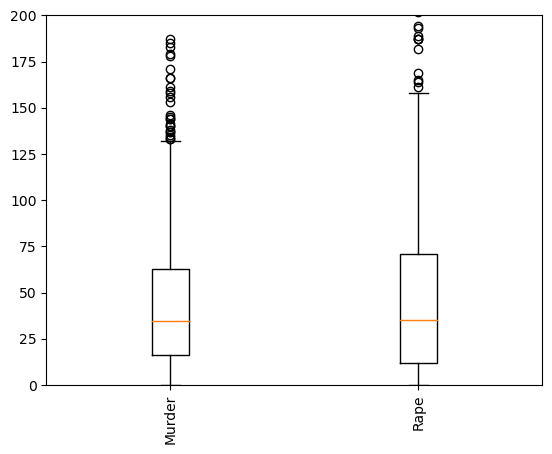

In [39]:
num_cols = ['Murder', 'Rape']
fig, ax = plt.subplots()
ax.boxplot(data[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,200)
plt.show()

# Scatter Matrix Plots

In [40]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[['Murder','Rape']], figsize=(10,10))

ModuleNotFoundError: No module named 'pandas.tools'

# Using Groupby to group the columns by state

In [41]:
print(data.head())

       States/UTs          District  Year  Murder  Attempt to commit Murder  \
0  Andhra Pradesh         Anantapur  2014     134                       171   
1  Andhra Pradesh          Chittoor  2014      84                       170   
2  Andhra Pradesh          Cuddapah  2014      80                       162   
3  Andhra Pradesh     East Godavari  2014      64                        84   
4  Andhra Pradesh  Guntakal Railway  2014      14                         4   

   Culpable Homicide not amounting to Murder  \
0                                          8   
1                                          2   
2                                          1   
3                                          2   
4                                          0   

   Attempt to commit Culpable Homicide  Rape  Custodial_Other Rape  \
0                                    0    35                     0   
1                                    0    32                     0   
2                         

In [42]:
states = data.groupby('States/UTs').aggregate(np.mean)
districts = data.groupby('District').aggregate(np.mean)
states.reset_index(inplace=True)
districts.reset_index(inplace=True)
print(states.head(1))
print(districts.head(1))

    States/UTs    Year  Murder  Attempt to commit Murder  \
0  A&N Islands  2014.0     4.0                       5.5   

   Culpable Homicide not amounting to Murder  \
0                                        2.0   

   Attempt to commit Culpable Homicide  Rape  Custodial_Other Rape  \
0                                  1.0  16.0                   0.0   

   Rape_Gang Rape  Rape_Others  ...  \
0             0.5         15.5  ...   

   Offences promoting enmity between different groups  \
0                                                0.5    

   Promoting enmity between different groups  \
0                                        0.5   

   Imputation, assertions prejudicial to national integration  Extortion  \
0                                                0.0                 0.0   

   Disclosure of Identity of Victims  Incidence of Rash Driving  \
0                                0.0                       99.0   

   HumanTrafficking  Unnatural Offence  Other IPC crimes  \
0 

In [43]:
print(states.shape[0])
print(districts.shape[0])

36
783


# Using pearson correlation factor to look at data

In [44]:
correlations = states.corr(method="pearson")
print(correlations["Murder"])

Year                                              NaN
Murder                                       1.000000
Attempt to commit Murder                     0.770817
Culpable Homicide not amounting to Murder    0.668936
Attempt to commit Culpable Homicide          0.064885
                                               ...   
Incidence of Rash Driving                    0.134365
HumanTrafficking                             0.569379
Unnatural Offence                            0.116164
Other IPC crimes                             0.735930
Total Cognizable IPC crimes                  0.673615
Name: Murder, Length: 86, dtype: float64


# Pearson Correlation factor says that Dowry deaths are positively related to Murder
Checking this with scatterplots

<Axes: xlabel='Murder', ylabel='Dowry Deaths'>

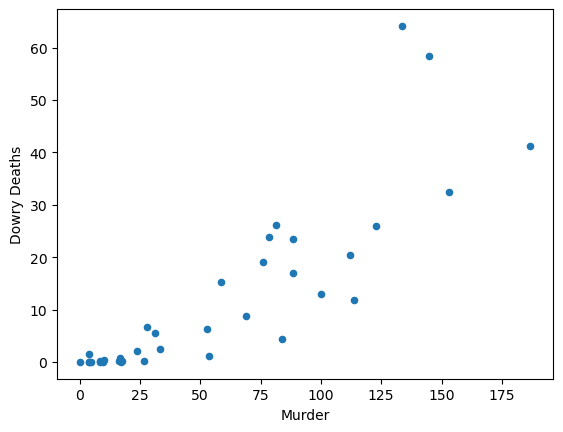

In [45]:
states.plot.scatter(x='Murder', y='Dowry Deaths')

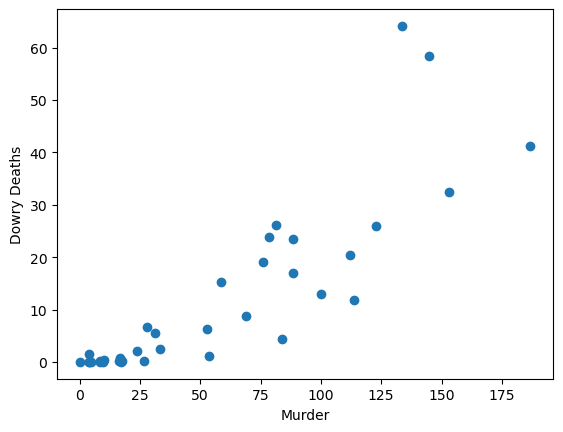

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(states['Murder'], states['Dowry Deaths'])
ax.set_xlabel('Murder')
ax.set_ylabel('Dowry Deaths')
plt.show()

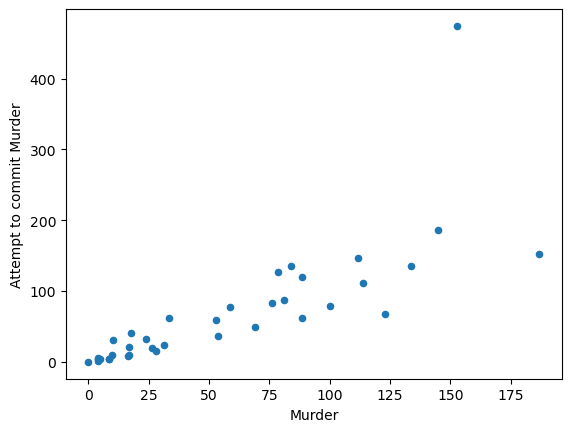

In [47]:
states.plot.scatter(x='Murder', y='Attempt to commit Murder')
plt.show()

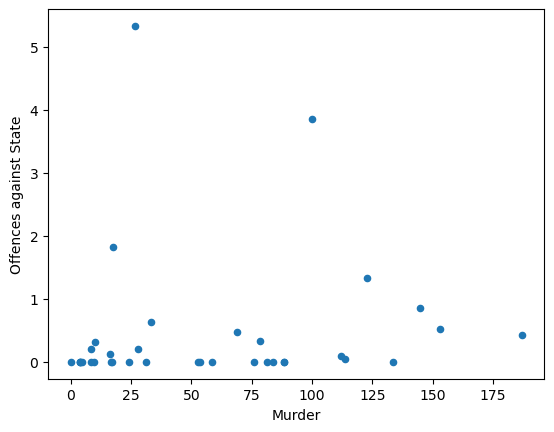

In [48]:
states.plot.scatter(x='Murder', y='Offences against State')
plt.show()